In [1]:
import pickle
import scipy
import numpy as np
import pandas as pd
from scipy import stats

dg = 'data/loc_gammapy_zALL.pickle'
dm = 'data/loc_cnn_zALL.pickle'

with open(dg,'rb') as f: dsg = np.array(pickle.load(f))
with open(dm,'rb') as f: dsm = np.array(pickle.load(f)[:2000])
    
dsm = dsm#[dsm <= 0.5]

len(dsg), len(dsm)

(2000, 2000)

In [2]:
dsg[30], dsm[30]

(0.03267523944387364, 0.029197028884738633)

In [3]:
np.median(dsg), np.median(dsm)

(0.03337795152961974, 0.046859495953744126)

In [4]:
np.var(dsg), np.var(dsm)

(0.0007523315372666053, 0.09422424422048704)

In [5]:
np.std(dsg), np.std(dsm)

(0.027428662695556365, 0.30695967849293665)

In [6]:
np.percentile(dsg, 68), np.percentile(dsm, 68)

(0.044372337467706226, 0.06795643453859672)

In [7]:
np.quantile(dsg, 0.68), np.quantile(dsm, 0.68)

(0.044372337467706226, 0.06795643453859672)

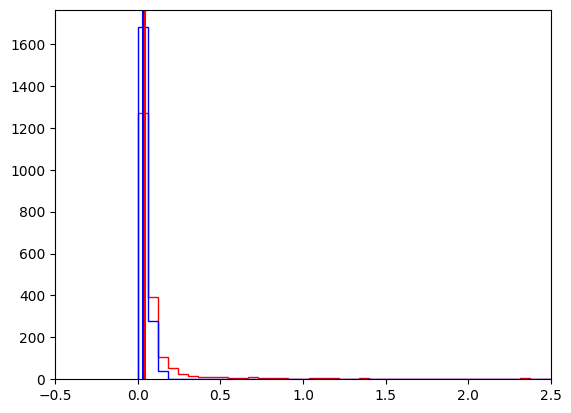

In [8]:
import matplotlib.pyplot as plt

plt.hist([dsg, dsm], bins=50, histtype='step', color=['b', 'r'])
plt.xlim([-0.5, 2.5])
plt.axvline(np.median(dsg), c='b')
plt.axvline(np.median(dsm), c='r')
plt.show()



In [9]:
from fitter import Fitter
from fitter import get_common_distributions

dists = get_common_distributions()
dists

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

2024-08-21 14:44:34.648 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=4284.344119)
2024-08-21 14:44:34.649 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=1873.896343)
2024-08-21 14:44:34.649 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=880.617654)
2024-08-21 14:44:34.650 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=427.983681)
2024-08-21 14:44:34.651 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=74.319846)
2024-08-21 14:44:34.656 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=584.30962)
2024-08-21 14:44:34.659 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=3676.652246)
2024-08-21 14:44:34.689 | INFO     | fitter.fitter:_fit_single_distribut

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,74.319846,49.976848,66.779556,inf,0.012584,9.053360e-01
chi2,116.668569,123.357805,140.160512,inf,0.030023,5.324869e-02
rayleigh,427.983681,495.995048,507.196853,inf,0.097857,4.016316e-17
cauchy,584.309620,14.859680,26.061485,inf,0.129022,1.740848e-29
norm,880.617654,732.989213,744.191018,inf,0.112285,2.027190e-22
exponpow,966.483329,399.797653,416.600360,inf,0.091678,4.445328e-15
expon,1873.896343,-68.021883,-56.820078,inf,0.172728,1.197721e-52
powerlaw,3676.652246,-253.521974,-236.719267,inf,0.330579,3.020959e-195
uniform,4284.344119,-295.648976,-284.447171,inf,0.581169,0.000000e+00
gamma,7014.298469,-85.652220,-68.849512,inf,0.363720,1.321758e-237


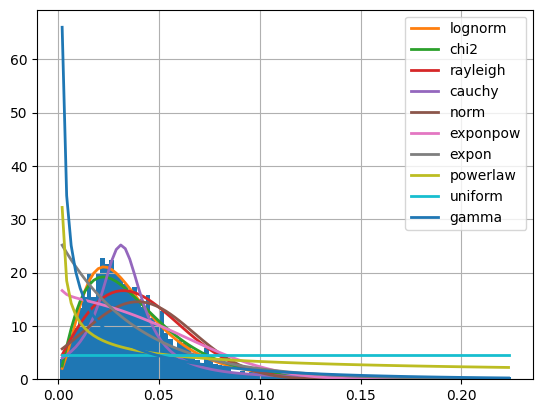

In [10]:
f = Fitter(dsg, distributions=dists, xmin=0, xmax=5, bins=100, density=False)
f.fit()
f.summary(10)

2024-08-21 14:44:37.082 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=52.38064)
2024-08-21 14:44:37.093 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=190.690852)
2024-08-21 14:44:37.098 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=174.645182)
2024-08-21 14:44:37.103 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=23.158881)
2024-08-21 14:44:37.110 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=20.988267)
2024-08-21 14:44:37.121 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=128.227724)
2024-08-21 14:44:37.122 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=235.480143)
2024-08-21 14:44:37.178 | INFO     | fitter.fitter:_fit_single_distribution:3

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,20.988267,1030.258029,1041.459834,inf,0.161414,5.397863e-46
lognorm,23.158881,1044.815583,1061.618291,inf,0.099621,9.891977e-18
expon,52.380640,1951.085493,1962.287298,inf,0.276926,4.420944e-136
gamma,53.010297,1225.644736,1242.447443,inf,0.178569,2.902893e-56
chi2,96.347032,508.507236,525.309944,inf,0.348670,8.327813e-218
exponpow,115.402830,411.262932,428.065640,inf,0.418542,6.098687e-318
powerlaw,128.227724,358.697565,375.500272,inf,0.392106,1.456737e-277
rayleigh,174.645182,2818.066145,2829.267950,inf,0.398292,9.824652e-287
norm,190.690852,2822.046693,2833.248498,inf,0.343708,1.749702e-211
uniform,235.480143,226.361242,237.563047,inf,0.831350,0.000000e+00


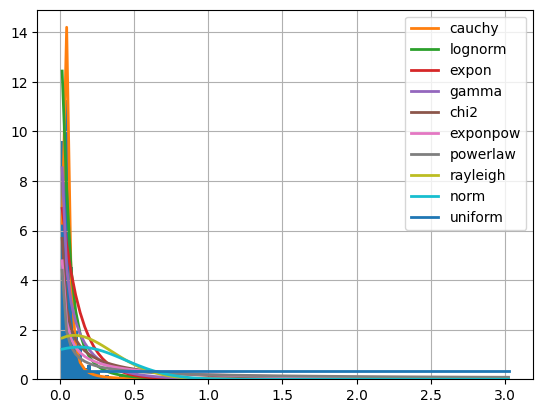

In [11]:
f = Fitter(dsm, distributions=dists, xmin=0, xmax=5, bins=100, density=False)
f.fit()
f.summary(10)

In [12]:
st = 'data/loc_stats_zALL.txt'

data = pd.read_csv(st, header=0, sep=' ')
data.head()

data['excess'].min(), data['excess'].max()

(46.42857142857143, 165.66666666666669)

In [13]:
cl = 'data/cleaner_zALL_sum_on_region.pickle'

with open(cl,'rb') as f: clon = pickle.load(f)

diff_excess = np.array(clon['DIFF'])

np.median(diff_excess), np.std(diff_excess)

(1.9393226262223018, 8.871904262177914)

In [14]:
cl = 'data/cleaner_z20_sum_on_region.pickle'

with open(cl,'rb') as f: clon = pickle.load(f)

diff_excess = np.array(clon['DIFF'])

np.median(diff_excess), np.std(diff_excess)

(-0.027136349337682636, 13.304665355238111)

In [29]:
table = 'data/cleaner_zALL_sum_original_and_diff.pickle'

with open(table,'rb') as f: data = pickle.load(f)

diff = np.array(data['DIFF'])

np.mean(diff), np.std(diff)

(65.74095919915935, 1648.8280654861433)